Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [77]:
NAME = "iyupopov"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [78]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        self.n = xk.size

    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        
        S = 0.0
        for i in range(len(self.yk)):
            result = 1.0
            for j in range(len(self.yk)):
                if i==j:
                    continue
                result *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
            S += result * self.yk[i]
        return S

In [79]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


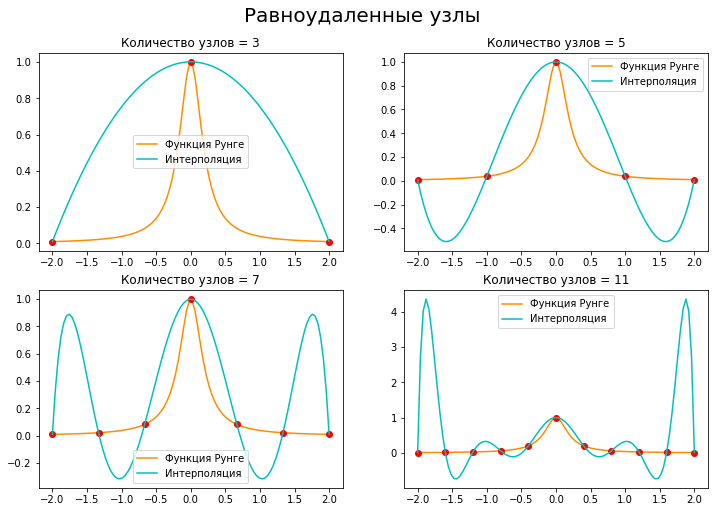

In [80]:
import matplotlib.pyplot as plt
t = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Равноудаленные узлы', fontsize=20, y=0.96)

for i,m in enumerate([3, 5, 7, 11]):
    ax[(i)//2, (i)%2].plot(t, runge_func(t), 'darkorange', label='Функция Рунге')
    nodes = np.linspace(-2, 2, m)
    lagr = LagrangeInterpolator(nodes, runge_func(nodes))
    ax[(i)//2, (i)%2].plot(nodes, runge_func(nodes), 'ro')
    ax[(i)//2, (i)%2].plot(t, [lagr(_) for _ in t], 'c', label='Интерполяция')
    ax[(i)//2, (i)%2].legend(loc = 'best')
    ax[(i)//2, (i)%2].set_title(f'Количество узлов = {m}')

In [81]:
def chebyshev_nodes(a, b, n):
    return [1/2*(a+b) + 1/2*(b-a)*np.cos(np.pi * (2*k - 1) / (2*n)) for k in range(1, n+1)]

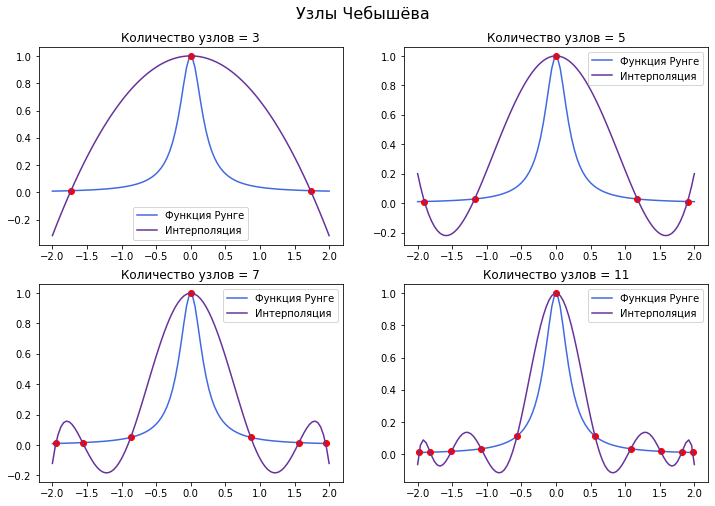

In [82]:
t = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Узлы Чебышёва', fontsize=16, y=0.95)

for i,m in enumerate([3, 5, 7, 11]):
    ax[(i)//2, (i)%2].plot(t, runge_func(t), 'royalblue', label='Функция Рунге')
    nodes = np.array(chebyshev_nodes(-2, 2, m))
    lagr = LagrangeInterpolator(nodes, runge_func(nodes))
    ax[(i)//2, (i)%2].plot(nodes, runge_func(nodes), 'ro')
    ax[(i)//2, (i)%2].plot(t, [lagr(_) for _ in t], color = 'rebeccapurple', label='Интерполяция')
    ax[(i)//2, (i)%2].legend(loc = 'best')
    ax[(i)//2, (i)%2].set_title(f'Количество узлов = {m}')